<a href="https://colab.research.google.com/github/khushics/linear-regression-advertising/blob/main/ad_sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project: Linear Regression - Predicting Sales from Advertising Spend

In [3]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# 2. Load the Data
url = 'https://raw.githubusercontent.com/khushics/linear-regression-advertising/main/advertising_sales.csv'
df = pd.read_csv(url)
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [7]:
# 3. Exploratory Data Analysis (EDA)
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Shape: (200, 5)
Missing values:
 ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


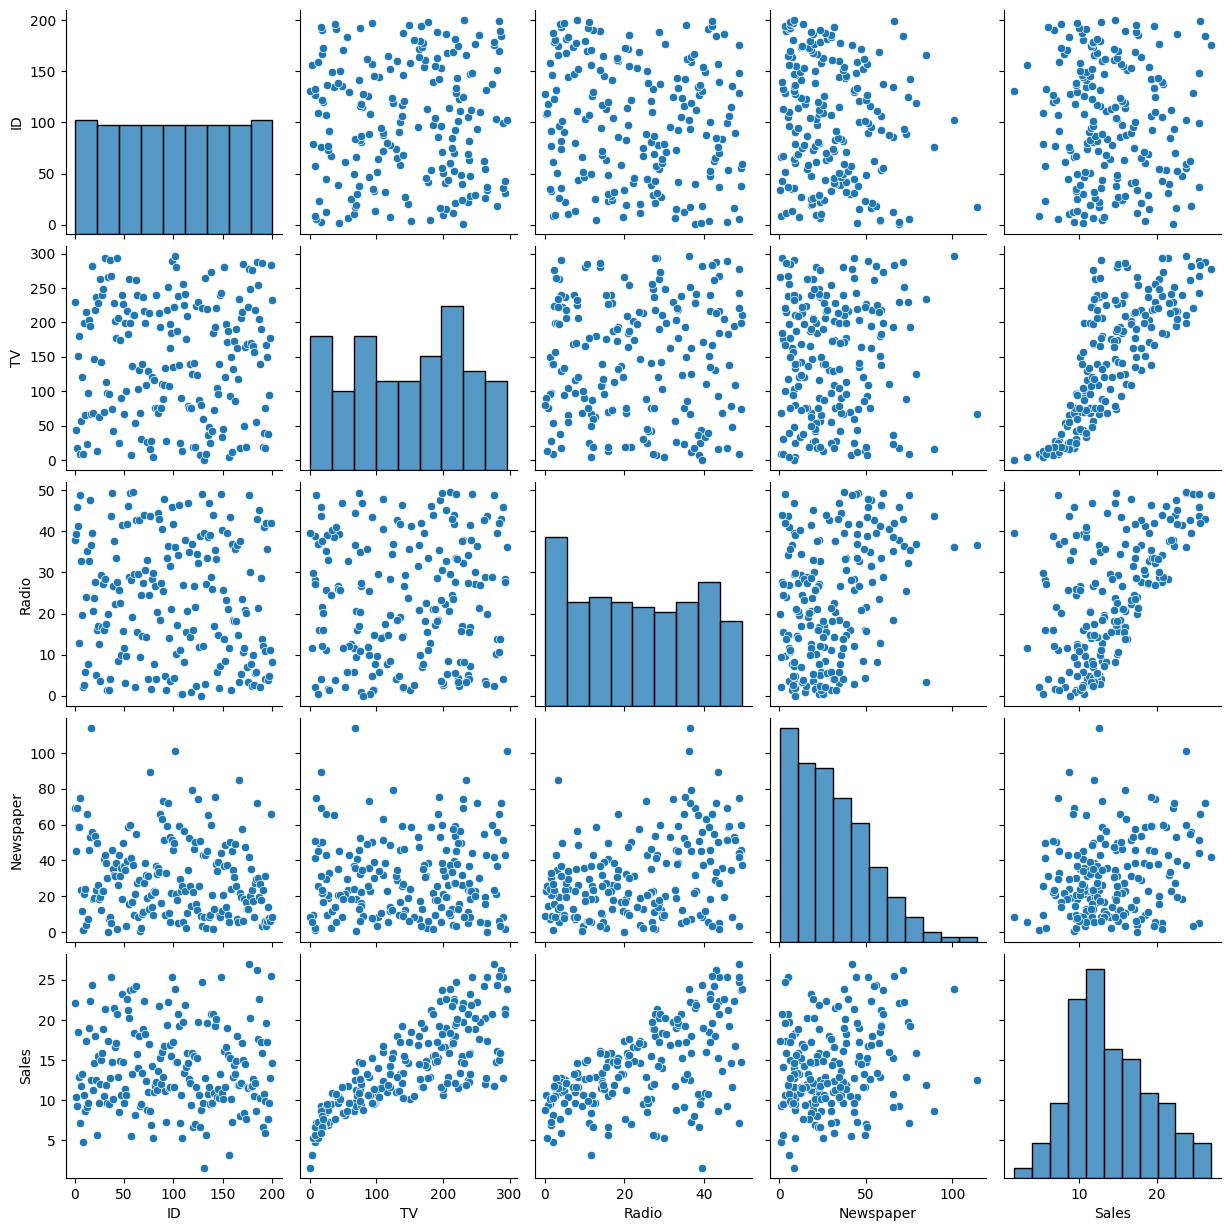

In [8]:
sns.pairplot(df)
plt.show()

The pairplot gives us a visual representation of the pairwise relationships between all numeric features in the dataset.
From the plot, we can see a strong linear trend between TV advertising spend and Sales, suggesting that TV may be the most impactful predictor.
Radio shows some positive correlation, while Newspaper seems to have a weak or no clear relationship with Sales.
The histograms on the diagonal show that most variables are roughly normally distributed, which supports linear modeling assumptions.

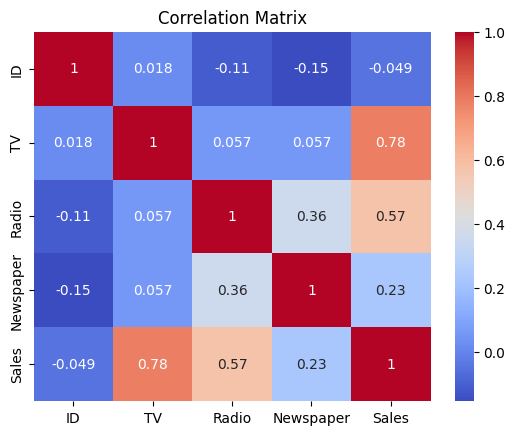

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation heatmap quantifies the linear relationships between variables.

TV and Sales have a high positive correlation (~0.78), indicating a strong linear relationship.

Radio and Sales also show moderate correlation (~0.57).

Newspaper and Sales have low correlation (~0.23), suggesting it may not be a useful predictor in our linear model.
There’s also low multicollinearity between predictors, so using them together in a regression model is appropriate.

In [10]:
# 4. Define Features and Target
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [11]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 6. Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Model coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", list(zip(X.columns, lr.coef_)))

Intercept: 3.059075327195769
Coefficients: [('TV', np.float64(0.04463250356641109)), ('Radio', np.float64(0.18732961985704835)), ('Newspaper', np.float64(0.0024293435156572535))]


In [14]:
# 7. Predictions
y_pred = lr.predict(X_test)

In [15]:
# 8. Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.899969103117516
MAE: 1.4520819111817602
RMSE: 1.7768890206332153


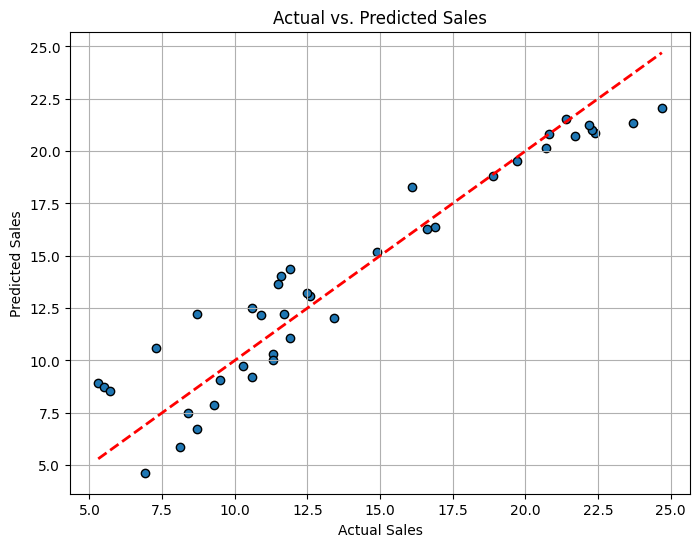

In [16]:
# 9. Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

# **Insights Summary**

**Feature Importance**

*   Based on model coefficients, TV spend has the strongest influence on sales.
*   Radio also contributes positively but to a lesser extent.
*   Newspaper has minimal impact — this aligns with the earlier heatmap.

**Model Performance**

*   R² Score: Measures how much variance in sales is explained by the model.
A score above 0.85 is strong in business applications.
*   MAE: Gives the average prediction error in units (same as sales).
*   RMSE: Penalizes larger errors more — useful for understanding outlier effects.

**What Could Be Improved**

*   The model assumes linear relationships; we could explore polynomial regression or interaction terms as well.
*   We might try feature engineering — for example, combining TV and Radio to simulate an omni-channel campaign.
*   Regularization (Ridge/Lasso) could help refine the model, especially if we had more predictors.
*   Consider adding categorical variables or external data (e.g., region, demographics) for deeper insights.
*   Cross-validation could be used for more robust evaluation rather than a single train/test split.






